# 1. Import and Install Dependencies

In [12]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [13]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [14]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [15]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [16]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [17]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [18]:
draw_landmarks(frame,results)

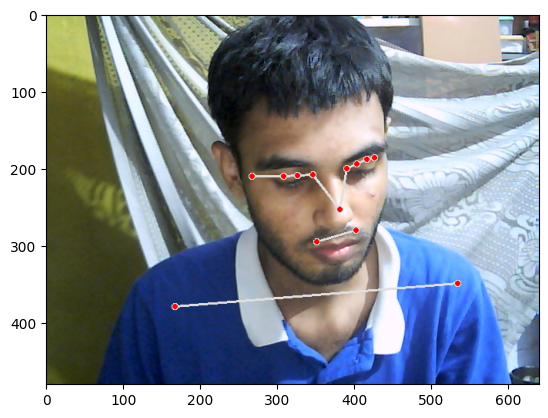

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [20]:
results.pose_landmarks

landmark {
  x: 0.5959674
  y: 0.5282137
  z: -1.854607
  visibility: 0.99968505
}
landmark {
  x: 0.610761
  y: 0.4169904
  z: -1.8176935
  visibility: 0.9993566
}
landmark {
  x: 0.6309498
  y: 0.40516335
  z: -1.817865
  visibility: 0.9994837
}
landmark {
  x: 0.65000135
  y: 0.39235073
  z: -1.8184083
  visibility: 0.99927515
}
landmark {
  x: 0.54149175
  y: 0.434782
  z: -1.8476648
  visibility: 0.9993957
}
landmark {
  x: 0.5099648
  y: 0.43709227
  z: -1.8473208
  visibility: 0.99948424
}
landmark {
  x: 0.48155245
  y: 0.43818128
  z: -1.8477781
  visibility: 0.9993504
}
landmark {
  x: 0.66717684
  y: 0.38777834
  z: -1.268968
  visibility: 0.9994146
}
landmark {
  x: 0.41779622
  y: 0.43793124
  z: -1.3827057
  visibility: 0.99976707
}
landmark {
  x: 0.6291673
  y: 0.58477795
  z: -1.6164824
  visibility: 0.999716
}
landmark {
  x: 0.5485672
  y: 0.6163403
  z: -1.6483657
  visibility: 0.99983484
}
landmark {
  x: 0.8359267
  y: 0.7272936
  z: -0.7309412
  visibility: 0.999

In [21]:
len(results.pose_landmarks.landmark)

33

In [22]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [23]:
pose

[array([ 0.59596741,  0.52821368, -1.85460699,  0.99968505]),
 array([ 0.61076099,  0.4169904 , -1.81769347,  0.99935663]),
 array([ 0.6309498 ,  0.40516335, -1.81786501,  0.9994837 ]),
 array([ 0.65000135,  0.39235073, -1.81840825,  0.99927515]),
 array([ 0.54149175,  0.434782  , -1.84766483,  0.99939573]),
 array([ 0.50996482,  0.43709227, -1.8473208 ,  0.99948424]),
 array([ 0.48155245,  0.43818128, -1.84777808,  0.99935043]),
 array([ 0.66717684,  0.38777834, -1.26896799,  0.99941462]),
 array([ 0.41779622,  0.43793124, -1.38270569,  0.99976707]),
 array([ 0.62916732,  0.58477795, -1.61648238,  0.99971598]),
 array([ 0.54856718,  0.61634028, -1.64836574,  0.99983484]),
 array([ 0.83592671,  0.72729361, -0.73094118,  0.99908519]),
 array([ 0.26095241,  0.79086912, -0.92843407,  0.99879766]),
 array([ 0.88791323,  1.21449363, -0.53033876,  0.50901991]),
 array([ 0.16999573,  1.32111871, -0.71730101,  0.27124694]),
 array([ 0.89098179,  1.59874141, -1.03805351,  0.6045655 ]),
 array([

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 5.95967412e-01,  5.28213680e-01, -1.85460699e+00,  9.99685049e-01,
        6.10760987e-01,  4.16990399e-01, -1.81769347e+00,  9.99356627e-01,
        6.30949795e-01,  4.05163348e-01, -1.81786501e+00,  9.99483705e-01,
        6.50001347e-01,  3.92350733e-01, -1.81840825e+00,  9.99275148e-01,
        5.41491747e-01,  4.34781998e-01, -1.84766483e+00,  9.99395728e-01,
        5.09964824e-01,  4.37092274e-01, -1.84732080e+00,  9.99484241e-01,
        4.81552452e-01,  4.38181281e-01, -1.84777808e+00,  9.99350429e-01,
        6.67176843e-01,  3.87778342e-01, -1.26896799e+00,  9.99414623e-01,
        4.17796224e-01,  4.37931240e-01, -1.38270569e+00,  9.99767065e-01,
        6.29167318e-01,  5.84777951e-01, -1.61648238e+00,  9.99715984e-01,
        5.48567176e-01,  6.16340280e-01, -1.64836574e+00,  9.99834836e-01,
        8.35926712e-01,  7.27293611e-01, -7.30941176e-01,  9.99085188e-01,
        2.60952413e-01,  7.90869117e-01, -9.28434074e-01,  9.98797655e-01,
        8.87913227e-01,  

In [28]:
33*4 + 21*3 +21*3  #468*3

258

In [29]:
np.save('0', result_test)

In [30]:
np.load('0.npy')

array([ 5.95967412e-01,  5.28213680e-01, -1.85460699e+00,  9.99685049e-01,
        6.10760987e-01,  4.16990399e-01, -1.81769347e+00,  9.99356627e-01,
        6.30949795e-01,  4.05163348e-01, -1.81786501e+00,  9.99483705e-01,
        6.50001347e-01,  3.92350733e-01, -1.81840825e+00,  9.99275148e-01,
        5.41491747e-01,  4.34781998e-01, -1.84766483e+00,  9.99395728e-01,
        5.09964824e-01,  4.37092274e-01, -1.84732080e+00,  9.99484241e-01,
        4.81552452e-01,  4.38181281e-01, -1.84777808e+00,  9.99350429e-01,
        6.67176843e-01,  3.87778342e-01, -1.26896799e+00,  9.99414623e-01,
        4.17796224e-01,  4.37931240e-01, -1.38270569e+00,  9.99767065e-01,
        6.29167318e-01,  5.84777951e-01, -1.61648238e+00,  9.99715984e-01,
        5.48567176e-01,  6.16340280e-01, -1.64836574e+00,  9.99834836e-01,
        8.35926712e-01,  7.27293611e-01, -7.30941176e-01,  9.99085188e-01,
        2.60952413e-01,  7.90869117e-01, -9.28434074e-01,  9.98797655e-01,
        8.87913227e-01,  

# 4. Setup Folders for Collection

In [114]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'Yo'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [115]:
# hello
    ## 0
    ## 1
    ## 2
    ## ...
    ## 29

# thanks


# I love you

In [116]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [117]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [118]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [119]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [120]:
label_map = {label:num for num, label in enumerate(actions)}

In [121]:
label_map

{'hello': 0, 'thanks': 1, 'Yo': 2}

In [122]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [123]:
np.array(sequences).shape

(90, 30, 258)

In [124]:
np.array(labels).shape

(90,)

In [125]:
X = np.array(sequences)

In [126]:
X.shape

(90, 30, 258)

In [127]:
y = to_categorical(labels).astype(int)

In [128]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [130]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [132]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [133]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [134]:
res = [.7, 0.2, 0.1]

In [135]:
actions[np.argmax(res)]

'hello'

In [136]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [137]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 75ms/step - loss: 1.1380 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9365 - categorical_accuracy: 0.5529
Epoch 3/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6949 - categorical_accuracy: 0.6000
Epoch 4/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0039 - categorical_accuracy: 0.4706
Epoch 5/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.8045 - categorical_accuracy: 0.6000
Epoch 6/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.7139 - categorical_accuracy: 0.6824
Epoch 7/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.7100 - categorical_accuracy: 0.6941
Epoch 8/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.6637 - categorical_accuracy: 0.7059
Epoch 9/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.5351 - categorical_accuracy: 0.7765
E

In [138]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 237251 (926.76 KB)
Trainable params: 237

# 8. Make Predictions

In [139]:
res = model.predict(X_test)

1/1 [==============================] - 0s 474ms/step


In [140]:
actions[np.argmax(res[4])]

'hello'

In [141]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [142]:
model.save('action.h5')

del model

In [143]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)

ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

multilabel_confusion_matrix(ytrue, yhat)

accuracy_score(ytrue, yhat)

# 11. Test in Real Time

In [148]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [145]:
cap.release()
cv2.destroyAllWindows()

In [146]:
res[np.argmax(res)] > threshold

True

In [147]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))